<a href="https://colab.research.google.com/github/kenanAST/yolov5_obb/blob/master/YOLOv5_OBB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How To Train YOLOv5 Oriented Bounding Boxes Custom Object Detection

Oriented bounding boxes are bounding boxes rotated to better fit the objects represented on an angle. In this notebook, we use the YOLOv5-OBB repository in order to train an already annotated dataset to view the Oriented bounding boxes detection at play.


## Instructions

Run one cell at at time and run:

```
>>> import torch
>>> torch.version.cuda
>>> exit()
```

when prompted to in the first cell. 

Addidtional Resources:

- [Yolov5-OBB installation instructions](https://github.com/hukaixuan19970627/yolov5_obb/blob/master/docs/install.md)
- [Getting started](https://github.com/hukaixuan19970627/yolov5_obb/blob/master/docs/GetStart.md)

In [ ]:
!pip3 install torch torchvision torchaudio
!nvcc -V
!python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
Python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 
>>> import torch
>>> torch.version.cuda
'11.8'
>>> exit()


In [ ]:
!git clone https://github.com/kenanAST/yolov5_obb.git

Cloning into 'yolov5_obb'...
remote: Enumerating objects: 745, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 745 (delta 146), reused 136 (delta 136), pack-reused 557
Receiving objects: 100% (745/745), 18.17 MiB | 30.75 MiB/s, done.
Resolving deltas: 100% (357/357), done.


In [ ]:
%cd /content/yolov5_obb/
!pip install -r requirements.txt

/content/yolov5_obb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.7.0.72
    Uninstalling opencv-contrib-python-4.7.0.72:
      Successfully uninstalled opencv-contrib-python-4.7.0.72


In [ ]:
%cd utils/nms_rotated
!python setup.py develop  #or "pip install -v -e ."

/content/yolov5_obb/utils/nms_rotated
running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or


In [ ]:
!unzip /content/ugv_dataset.zip

Archive:  /content/ugv_dataset.zip
   creating: ugv_dataset/
  inflating: __MACOSX/._ugv_dataset  
  inflating: ugv_dataset/imgnamefile.txt  
   creating: ugv_dataset/train/
   creating: ugv_dataset/val/
   creating: ugv_dataset/train/images/
  inflating: ugv_dataset/train/labelTxt.cache  
  inflating: __MACOSX/ugv_dataset/train/._labelTxt.cache  
   creating: ugv_dataset/train/labelTxt/
   creating: ugv_dataset/val/images/
  inflating: ugv_dataset/val/labelTxt.cache  
  inflating: __MACOSX/ugv_dataset/val/._labelTxt.cache  
   creating: ugv_dataset/val/labelTxt/
  inflating: ugv_dataset/train/images/0071.jpg  
  inflating: ugv_dataset/train/images/0717.jpg  
  inflating: ugv_dataset/train/images/0703.jpg  
  inflating: ugv_dataset/train/images/0059.jpg  
  inflating: ugv_dataset/train/images/0273.jpg  
  inflating: ugv_dataset/train/images/0267.jpg  
  inflating: ugv_dataset/train/images/1179.jpg  
  inflating: ugv_dataset/train/images/1151.jpg  
  inflating: ugv_dataset/train/images/

In [ ]:
%cd /content/yolov5_obb/
!python train.py --data /content/yolov5_obb/data/ugv.yaml --epochs 200 --batch-size 32 --weights elaine300.pt --img 680 --cache --device 0


/content/yolov5_obb
2023-05-31 09:26:27.677670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-31 09:26:28.767843: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=elaine300.pt, cfg=, data=/content/yolov5_obb/data/ugv.yaml, hyp=data/hyps/obb/hyp.finetune_dota.yaml, epochs=200, batch_size=32, imgsz=680, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_data

In [ ]:
%cd /content/yolov5_obb/

/content/yolov5_obb


In [ ]:
!python detect.py --weights 'runs/train/exp/weights/best.pt' --source '../datasets/roboflow/valid/images' --img 416 --device 0 --agnostic

detect: weights=['runs/train/exp/weights/best.pt'], source=../datasets/roboflow/valid/images, imgsz=[416, 416], conf_thres=0.01, iou_thres=0.4, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=True, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 3f2e708 torch 1.10.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 290 layers, 21681339 parameters, 0 gradients, 50.6 GFLOPs
image 1/100 /content/datasets/roboflow/valid/images/A1_jpg.rf.467e301f7decc39d6f77e45ab7614421.jpg: 416x416 1 J, Done. (0.020s)
image 2/100 /content/datasets/roboflow/valid/images/A23_jpg.rf.07a011103d0153dcd03a18761c226699.jpg: 416x416 1 J, Done. (0.020s)
image 3/100 /content/datasets/roboflow/valid/images/A27_jpg.rf.6814a529152cbda95b5d5ff2f0594a96.jpg: 416x416 1 J, Done. (0.020s)
image 4/

In [ ]:
%cd /content/yolov5_obb/runs/detect/exp/

/content/yolov5_obb/runs/detect/exp


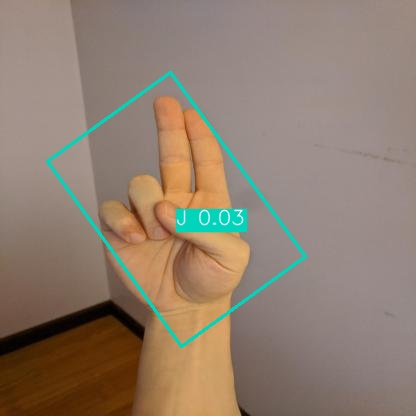

In [ ]:
import os, random
random_file = random.choice(os.listdir("/content/yolov5_obb/runs/detect/exp"))

from IPython.display import Image
Image(random_file)